In [1]:
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

2.2.0


In [3]:
tf.executing_eagerly()


True

In [16]:
raw_dataset = tf.data.TFRecordDataset('/home/eshahrivar/pilco/badgr/data/0001.tfrecord')
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [17]:
names_shapes_limits_dtypes=(
    ('images/rgb_left', (96, 128, 3), (0, 255), np.uint8),
    ('images/rgb_right', (96, 128, 3), (0, 255), np.uint8),
    ('images/thermal', (32, 32), (-1, 1), np.float32), # TODO: don't know good limits
    ('lidar', (360,), (0., 12.), np.float32),
    ('collision/close', (1,), (0, 1), np.bool),
    ('collision/flipped', (1,), (0, 1), np.bool),
    ('collision/stuck', (1,), (0, 1), np.bool),
    ('collision/any', (1,), (0, 1), np.bool),
    ('gps/is_fixed', (1,), (0, 1), np.float32),
    ('gps/latlong', (2,), (0, 1), np.float32),
    ('gps/utm', (2,), (0, 1), np.float32),
    ('imu/angular_velocity', (3,), (-1.0 * np.pi, 1.0 * np.pi), np.float32),
    ('imu/compass_bearing', (1,), (-np.pi, np.pi), np.float32),
    ('imu/linear_acceleration', (3,), ((-1., -1., 9.81-1.), (1., 1., 9.81+1.)), np.float32),
    ('jackal/angular_velocity', (1,), (-1.0 * np.pi, 1.0 * np.pi), np.float32),
    ('jackal/linear_velocity', (1,), (-1., 1.), np.float32),
    ('jackal/imu/angular_velocity', (3,), (-1.0 * np.pi, 1.0 * np.pi), np.float32),
    ('jackal/imu/linear_acceleration', (3,), ((-1., -1., 9.81-1.), (1., 1., 9.81+1.)), np.float32),
    ('jackal/position', (3,), (-0.5, 0.5), np.float32),
    ('jackal/yaw', (1,), (-np.pi, np.pi), np.float32),
    ('android/illuminance', (1,), (0., 200.), np.float32),
    ('bumpy', (1,), (0, 1), np.bool),

    ('commands/angular_velocity', (1,), (-1.0, 1.0), np.float32),
    ('commands/linear_velocity', (1,), (0.75, 1.25), np.float32)
)

In [18]:
image_feature_description = {
    'inputs/images/rgb_right': tf.io.FixedLenFeature([], tf.string),
}


def _parse_function(example_proto):
  # Parse the input `tf.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

import IPython.display as display
import scipy.misc
from PIL import Image
import cv2
import IPython
from matplotlib import pyplot as plt

for features in parsed_dataset:
    image_raw = tf.io.decode_raw(features['inputs/images/rgb_right'],np.uint8)
    image_raw.set_shape([np.prod((96, 128, 3))])
    image_raw = tf.reshape(image_raw, (96, 128, 3))
    image_proto = tf.make_tensor_proto(image_raw)
    image = tf.make_ndarray(image_proto)
    cv2.imshow("image", image)
    cv2.waitKey(100)

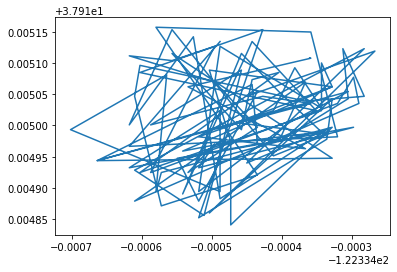

In [57]:
gps_feature_description = {
    'inputs/gps/latlong': tf.io.FixedLenFeature([], tf.string),
}

def _parse_function(example_proto):
  # Parse the input `tf.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, gps_feature_description)

parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

gps_cords = np.array([  37.915108, -122.33436 ])

for features in parsed_dataset:
    gps_raw = tf.io.decode_raw(features['inputs/gps/latlong'],np.float32)
    gps_raw.set_shape([np.prod((2,))])
    gps_raw = tf.reshape(gps_raw, (2,))
    gps_proto = tf.make_tensor_proto(gps_raw)
    gps = tf.make_ndarray(gps_proto)
    gps_cords = np.vstack((gps_cords, np.array([gps[0], gps[1]])))
#print(gps_cords)
plt.plot(gps_cords[:,1], gps_cords[:,0])